<a href="https://colab.research.google.com/github/rjrahul24/ai-with-python-series/blob/main/09.%20NLP%2C%20Bag%20of%20Words%20and%20Sentiment%20Analysis/Hybrid_Approach_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary packages
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
# Data Source: https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv
import_data_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
sentiment_tweets = pd.read_csv(import_data_url)

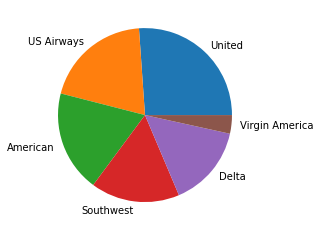

In [2]:
# Running EDA on the input data set to understand it better. Distribution of tweets based on the airlines
sentiment_tweets.airline.value_counts().plot(kind='pie', label='')

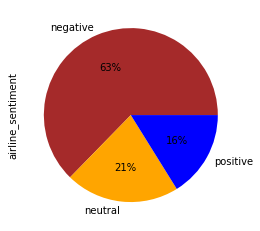

In [3]:
# Distinguish between the type of sentiments shown by users
sentiment_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["brown", "orange", "blue"])

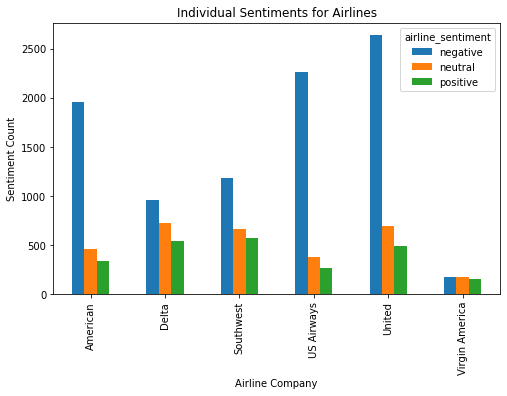

In [4]:
airline_grouped_sentiment = sentiment_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_grouped_sentiment.plot(figsize=(8,5), kind='bar', title='Individual Sentiments for Airlines', xlabel='Airline Company', ylabel='Sentiment Count')

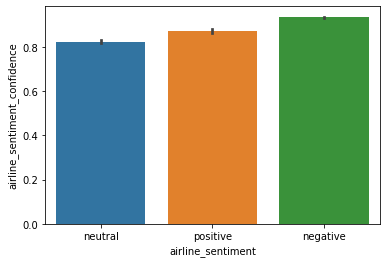

In [5]:
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=sentiment_tweets)

In [6]:
# Cleaning of data: Since these tweets might contain punctuation marks and other non-relevant characters, we will process those and remove them from the model
# Let us also divide the feature and label sets for this data
feature_set = sentiment_tweets.iloc[:, 10].values
label_set = sentiment_tweets.iloc[:, 1].values
cleaned_feature_set = list()
for input_phrase in range(0, len(feature_set)):
    # 1. Removing all the special characters (*,etc.) and single characters (a,an,etc.)
    clean_feature = re.sub(r'\W', ' ', str(feature_set[input_phrase]))
    clean_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_feature)
    clean_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_feature) 
    # 2. Convert the entire phrase to lower cases
    clean_feature = clean_feature.lower()
    cleaned_feature_set.append(clean_feature)

In [10]:
# Changing the text to a numerical form: All machine learning and statistical models use mathematics and numbers to compute data. Since the input here is textual, we will use the TF-IDF scheme to process words.
# Import the necessary packages
import nltk
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
input_vector = TfidfVectorizer (max_features=3000, min_df=6, max_df=0.8, stop_words=stopwords.words('english'))
cleaned_feature_set = input_vector.fit_transform(cleaned_feature_set).toarray()

In [12]:
# Let us now use the Train, Test, Split function to divide this data into training and testing sets. We will use the training set to train the model and find the best suitable model for this prediction and then run that model on the test data to finalize the prediction score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_feature_set, label_set, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_score = rf_classifier.score(X_train, y_train)
# Support Vector Machine Linear Classification
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_classifier_score = svc_classifier.score(X_train, y_train)
# Logistic Regression
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
lr_classifier_score = lr_classifier.score(X_train, y_train)
# K-Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier_score = knn_classifier.score(X_train, y_train)

# Comparision of individual accuracy scores
accuracy_scores = []
Used_ML_Models = ['Random Forest Classification','Support Vector Machine Classification','Logistic Regression',
                   'KNN Classification']
accuracy_scores.append(rf_classifier_score)
accuracy_scores.append(svc_classifier_score)
accuracy_scores.append(lr_classifier_score)
accuracy_scores.append(knn_classifier_score)
score_comparisons = pd.DataFrame(Used_ML_Models, columns = ['Classifiers'])
score_comparisons['Accuracy on Training Data'] = accuracy_scores
score_comparisons

,Classifiers,Accuracy on Training Data
0,Random Forest Classification,0.992965
1,Support Vector Machine Classification,0.859808
2,Logistic Regression,0.820759
3,KNN Classification,0.797308


In [13]:
# We see that the Random Forest Classifier performs the best
# Final prediction using the best-case algorithm from the above table
final_pred = rf_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))

0.7667632450331126
